# homework14
数据集 ex14.csv 是关于中国各个省份的三项指标数值。请根据这些指标数值，将各个省份分为3类，并尝试归纳出各个类别的特点。

DXBZ：人口中大学文凭占全部文凭的比重 

CZBZ：人口中初中文凭占全部文凭的比重 

WMBZ：人口中文盲占全部文凭的比重

In [21]:
# coding: utf-8

import pandas as pd

In [22]:
ex14 = pd.read_csv("ex14.csv",encoding="gbk")
ex14.columns = ["CITY","DXBZ","CZBZ","WMBZ"]
ex14.head()

,CITY,DXBZ,CZBZ,WMBZ
0,北京,9.30,30.55,8.70
1,天津,4.67,29.38,8.92
2,河北,0.96,24.69,15.21
3,山西,1.38,29.24,11.30
4,内蒙古,1.48,25.47,15.39


# 凝聚的层次聚类法

In [23]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets

In [24]:
Y = ex14.iloc[:,0] #Target
X = ex14.iloc[:,1:4]#Data
print("Data \n",X.head(),"\n")
print("Target \n",Y.head(),"\n")


Data 
    DXBZ   CZBZ   WMBZ
0  9.30  30.55   8.70
1  4.67  29.38   8.92
2  0.96  24.69  15.21
3  1.38  29.24  11.30
4  1.48  25.47  15.39 

Target 
 0     北京
1     天津
2     河北
3     山西
4    内蒙古
Name: CITY, dtype: object 



In [25]:
# train = []
# print(train)

# for c in data.columns:
#     train.append(X[c].values)
    
# train = np.array(train)
# print(train)

# n_samples,n_features = train.shape
# print ("n_samples \n",n_samples,"\n")
# print("n_features \n",n_features)

In [26]:
train = X.values
print(train)
n_samples,n_features = train.shape
print ("n_samples \n",n_samples,"\n")
print("n_features \n",n_features)

[[ 9.3  30.55  8.7 ]
 [ 4.67 29.38  8.92]
 [ 0.96 24.69 15.21]
 [ 1.38 29.24 11.3 ]
 [ 1.48 25.47 15.39]
 [ 2.6  32.32  8.81]
 [ 2.15 26.31 10.49]
 [ 2.14 28.46 10.87]
 [ 6.53 31.59 11.04]
 [ 1.47 26.43 17.23]
 [ 1.17 23.74 17.46]
 [ 0.88 19.97 24.43]
 [ 1.23 16.87 15.63]
 [ 0.99 18.84 16.22]
 [ 0.98 25.18 16.87]
 [ 0.85 26.55 16.15]
 [ 1.57 23.16 15.79]
 [ 1.14 22.57 12.1 ]
 [ 1.34 23.04 10.45]
 [ 0.79 19.14 10.61]
 [ 1.24 22.53 13.97]
 [ 0.96 21.65 16.24]
 [ 0.78 14.65 24.27]
 [ 0.81 13.85 25.44]
 [ 0.57  3.85 44.43]
 [ 1.67 24.36 17.62]
 [ 1.1  16.85 27.93]
 [ 1.49 17.76 27.7 ]
 [ 1.61 20.27 22.06]
 [ 1.85 20.66 12.75]]
n_samples 
 30 

n_features 
 3


In [29]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']  

# Visualize the clustering
def plot_clustering(X_red_, X, labels, title):
    x_min, x_max = np.min(X_red_, axis=0), np.max(X_red_, axis=0)
    X_red_ = (X_red_ - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red_[i, 0], X_red_[i, 1], str(Y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()
    

Computing embedding
Done.


d:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


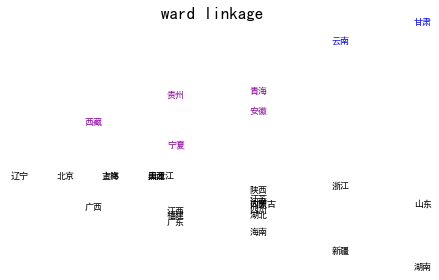

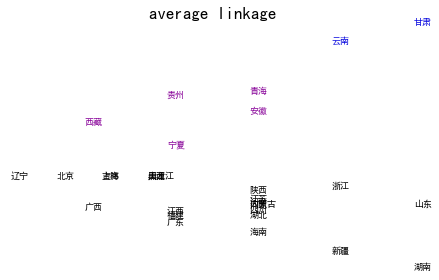

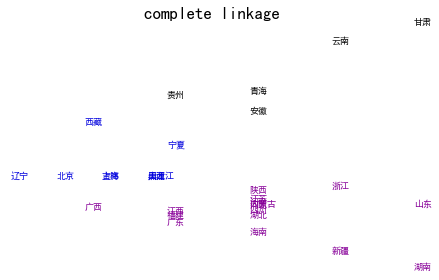

In [31]:
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(train)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering.fit(X_red)
    plot_clustering(X_red, train, clustering.labels_, "%s linkage" % linkage)


plt.show()

# Kmeans

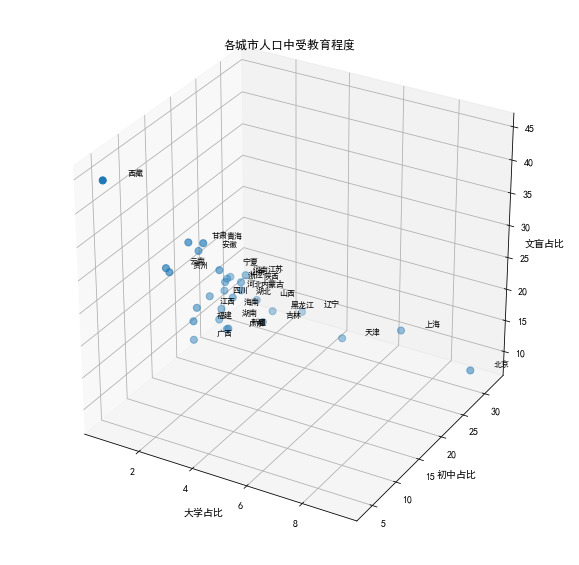

In [32]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(train[:,0],train[:,1],train[:,2],s=50)
ax.set_xlabel('大学占比')
ax.set_ylabel('初中占比') 
ax.set_zlabel('文盲占比') 
ax.set_title('各城市人口中受教育程度')
i=0
for x,y,z in train:
#     print(x)
#     print(i)
#     print(Y.values[i])
    ax.text3D(x+1, y+1, z+1,'%s' % Y.values[i], ha='center', va= 'bottom',fontsize=8)
    i+=1

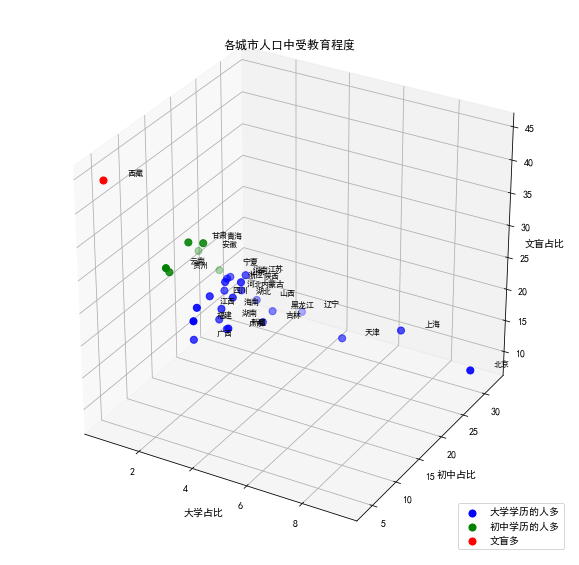

In [44]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

estimator = KMeans(n_clusters=3,max_iter=600,n_init=20)#构造聚类器
estmator = estimator.fit(train)#聚类
label_pred = estimator.labels_ #获取聚类标签

#绘制k-means结果
x0 = train[label_pred == 0]
x1 = train[label_pred == 1]
x2 = train[label_pred == 2]


fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x0[:,0],x0[:,1],x0[:,2],s=50,c = "blue", marker='o', label='大学学历的人多')
ax.scatter(x1[:,0],x1[:,1],x1[:,2],s=50,c = "green", marker='o', label='初中学历的人多') 
ax.scatter(x2[:,0],x2[:,1],x2[:,2],s=50,c = "red", marker='o', label='文盲多')  
plt.legend(loc=4)
ax.set_xlabel('大学占比')
ax.set_ylabel('初中占比') 
ax.set_zlabel('文盲占比')
ax.set_title('各城市人口中受教育程度')
i=0
for x,y,z in train:
#     print(x)
#     print(i)
#     print(Y.values[i])
    ax.text3D(x+1, y+1, z+1,'%s' % Y.values[i], ha='center', va= 'bottom',fontsize=8)
    i+=1

Text(0.5,1,'Best k')

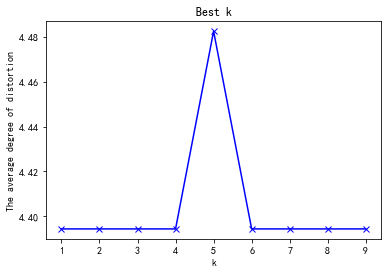

In [36]:

K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(train)
    # 成本函数（肘部法则）
    meandistortions.append(sum(np.min(cdist(train, 
                                            kmeans.cluster_centers_,
                                            'euclidean'), axis=1)) / train.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('The average degree of distortion')
plt.title('Best k')

In [4]:
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv("ex14.csv",index_col=0,header=0,encoding='gbk')
# data=pd.read_csv('d:/data/ex14.csv',index_col=0,header=0,encoding='gbk')

#k-means聚类
model = KMeans(n_clusters = 3)
model.fit(data)
 
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(data.columns) + [u'类别数目'] #重命名表头
print(r)


       DXBZ       CZBZ       WMBZ  类别数目
0  1.111250  17.382500  22.960000     8
1  2.201905  25.572381  13.236667    21
2  0.570000   3.850000  44.430000     1
